<a href="https://colab.research.google.com/github/anshupandey/Computer-Vision/blob/master/YOLO_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **YOLO**




# Installing Darknet

In [ ]:
!git clone https://github.com/AlexeyAB/darknet
import os
os.chdir("/content/darknet")

Cloning into 'darknet'...
remote: Enumerating objects: 14321, done.
remote: Total 14321 (delta 0), reused 0 (delta 0), pack-reused 14321
Receiving objects: 100% (14321/14321), 12.87 MiB | 24.54 MiB/s, done.
Resolving deltas: 100% (9771/9771), done.


In [ ]:
# Compiling darknet
!sed -i 's/GPU=0/GPU=1/g' Makefile
!cat Makefile
!make

GPU=1
CUDNN=0
CUDNN_HALF=0
OPENCV=0
AVX=0
OPENMP=0
LIBSO=0
ZED_CAMERA=0
ZED_CAMERA_v2_8=0

# set GPU=1 and CUDNN=1 to speedup on GPU
# set CUDNN_HALF=1 to further speedup 3 x times (Mixed-precision on Tensor Cores) GPU: Volta, Xavier, Turing and higher
# set AVX=1 and OPENMP=1 to speedup on CPU (if error occurs then set AVX=0)
# set ZED_CAMERA=1 to enable ZED SDK 3.0 and above
# set ZED_CAMERA_v2_8=1 to enable ZED SDK 2.X

USE_CPP=0
DEBUG=0

ARCH= -gencode arch=compute_30,code=sm_30 \
      -gencode arch=compute_35,code=sm_35 \
      -gencode arch=compute_50,code=[sm_50,compute_50] \
      -gencode arch=compute_52,code=[sm_52,compute_52] \
	    -gencode arch=compute_61,code=[sm_61,compute_61]

OS := $(shell uname)

# Tesla A100 (GA100), DGX-A100, RTX 3080
# ARCH= -gencode arch=compute_80,code=[sm_80,compute_80]

# Tesla V100
# ARCH= -gencode arch=compute_70,code=[sm_70,compute_70]

# GeForce RTX 2080 Ti, RTX 2080, RTX 2070, Quadro RTX 8000, Quadro RTX 6000, Quadro RTX 5000, Tesla T4, X

In [ ]:
# downloading YOLO model
os.chdir("/content/darknet")
!wget https://www.dropbox.com/s/m3tg61e1wsvawoq/darknet53.conv.74

--2020-09-30 03:32:49--  https://www.dropbox.com/s/m3tg61e1wsvawoq/darknet53.conv.74
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/m3tg61e1wsvawoq/darknet53.conv.74 [following]
--2020-09-30 03:32:49--  https://www.dropbox.com/s/raw/m3tg61e1wsvawoq/darknet53.conv.74
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc19f03c4175072ea600e41089d7.dl.dropboxusercontent.com/cd/0/inline/BAUvtM_C2HdrKBanshPTlEGlnrB7JkR4kRE1ksNwFqUd7azUVhxy6BtuNHglZ9pHyuSUx5ZMHtXcTNPGzBBEaFfk1D0NuMLjIBaFs6lGEgAzlwyjoDCn45jbhdj66gmZyFk/file# [following]
--2020-09-30 03:32:50--  https://uc19f03c4175072ea600e41089d7.dl.dropboxusercontent.com/cd/0/inline/BAUvtM_C2HdrKBanshPTlEGlnrB7JkR4kRE1ksNwFqUd7azUVhxy6BtuNHglZ9pHyuSUx5ZMHtXcTNPGzBBEaFfk1D0NuMLjIBa

In [ ]:
os.chdir("/content/darknet/data")
!wget -q https://www.dropbox.com/s/v2gmvmup24m5kzq/yolo-dataset.zip

In [ ]:
!unzip yolo-dataset.zip

Archive:  yolo-dataset.zip
  inflating: obj.data                
   creating: __MACOSX/
  inflating: __MACOSX/._obj.data     
  inflating: train.txt               
   creating: img/
  inflating: img/output-000000034.txt  
  inflating: img/output-000000308.jpg  
  inflating: img/output-000000746.txt  
  inflating: img/output-000000020.txt  
  inflating: img/output-000000334.jpg  
  inflating: img/output-000000008.txt  
  inflating: img/output-000000452.jpg  
  inflating: img/output-000000446.jpg  
  inflating: img/output-000000320.jpg  
  inflating: img/output-000000491.jpg  
  inflating: img/output-000000485.jpg  
  inflating: img/output-000000550.txt  
  inflating: img/output-000000236.txt  
  inflating: img/output-000000222.txt  
  inflating: img/output-000000678.jpg  
  inflating: img/output-000000544.txt  
  inflating: img/output-000000650.jpg  
  inflating: img/output-000000136.jpg  
  inflating: img/output-000000122.jpg  
  inflating: img/output-000000578.txt  
  inflating: img/o

In [ ]:
# either make changes manually or run the below code
os.chdir("/content/darknet")
!sed -i 's/batch=1/batch=64/g' cfg/yolov3.cfg
!sed -i 's/subdivisions=1/subdivisions=32/g' cfg/yolov3.cfg
!sed -i 's/max_batches = 500200/max_batches = 5000/g' cfg/yolov3.cfg
!sed -i 's/steps=400000,450000/steps=4000,5000/g' cfg/yolov3.cfg
!sed -i 's/classes=80/classes=5/g' cfg/yolov3.cfg
!sed -i 's/filters=255/filters=30/g' cfg/yolov3.cfg
!cat cfg/yolov3.cfg

[net]
# Testing
batch=64
subdivisions=32
# Training
# batch=64
# subdivisions=326
width=416
height=416
channels=3
momentum=0.9
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1

learning_rate=0.001
burn_in=1000
max_batches = 5000
policy=steps
steps=4000,5000
scales=.1,.1

[convolutional]
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=leaky

# Downsample

[convolutional]
batch_normalize=1
filters=64
size=3
stride=2
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=32
size=1
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=leaky

[shortcut]
from=-3
activation=linear

# Downsample

[convolutional]
batch_normalize=1
filters=128
size=3
stride=2
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=leaky

[shortcut]
from=-3
activation=linear

[convolutional]


In [ ]:
os.chdir("/content/darknet")
# use the line below to retrain your previous saved weight
!./darknet detector train data/obj.data cfg/yolov3.cfg darknet53.conv.74

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.456926, GIOU: 0.403139), Class: 0.480302, Obj: 0.529564, No Obj: 0.333841, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 95.458252, iou_loss = 0.941116, total_loss = 96.399368 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.144231, GIOU: -0.010563), Class: 0.637650, Obj: 0.167278, No Obj: 0.226551, .5R: 0.000000, .75R: 0.000000, count: 3, class_loss = 182.853195, iou_loss = 10.270905, total_loss = 193.124100 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.128753, GIOU: -0.323242), Class: 0.558855, Obj: 0.054481, No Obj: 0.123314, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 223.840469, iou_loss = 5.276566, total_loss = 229.117035 
 total_bbox = 22436, rewritten_bbox = 0.218399 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.312097, GIOU: 0.053254), Class: 0.547971, Obj: 0.613

In [ ]:
os.chdir("/content/darknet")
!wget -q https://cdn.pixabay.com/photo/2016/09/13/16/21/colorful-1667624_960_720.jpg

In [ ]:
os.chdir("/content/darknet")

In [ ]:
import cv2

['Tug', 'Ferry', 'Sailboat', 'Cruise', 'Unknown']
[INFO] loading YOLO from disk...
[INFO] YOLO took 1.792498 seconds


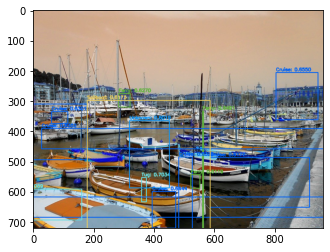

In [ ]:
import numpy as np
import argparse
import time
import cv2
import os

img_name = "colorful-1667624_960_720.jpg"
confidence_val = 0.6 # for confidence filtering of object detection
threshold = 0.4 # for NMS

LABELS = open("data/obj.names").read().strip().split("\n")
# initialize a list of colors to represent each possible class label
np.random.seed(42)
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3),dtype="uint8")
print(LABELS)
# derive the paths to the YOLO weights and model configuration
weightsPath = "backup/yolov3_last.weights"
configPath = "cfg/yolov3.cfg"
# load our YOLO object detector trained on COCO dataset (80 classes)
print("[INFO] loading YOLO from disk...")
net = cv2.dnn.readNetFromDarknet(configPath, weightsPath)

image = cv2.imread(img_name)
(H, W) = image.shape[:2]
# determine only the *output* layer names that we need from YOLO
ln = net.getLayerNames()
ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]
# construct a blob from the input image and then perform a forward
# pass of the YOLO object detector, giving us our bounding boxes and
# associated probabilities
blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416),
	swapRB=True, crop=False)
net.setInput(blob)
start = time.time()
layerOutputs = net.forward(ln)
end = time.time()
# show timing information on YOLO
print("[INFO] YOLO took {:.6f} seconds".format(end - start))
# initialize our lists of detected bounding boxes, confidences, and
# class IDs, respectively
boxes = []
confidences = []
classIDs = []


# loop over each of the layer outputs
for output in layerOutputs:
	# loop over each of the detections
	for detection in output:
		# extract the class ID and confidence (i.e., probability) of
		# the current object detection
		scores = detection[5:]
		classID = np.argmax(scores)
		confidence = scores[classID]
		# filter out weak predictions by ensuring the detected
		# probability is greater than the minimum probability
		if confidence > confidence_val:
			# scale the bounding box coordinates back relative to the
			# size of the image, keeping in mind that YOLO actually
			# returns the center (x, y)-coordinates of the bounding
			# box followed by the boxes' width and height
			box = detection[0:4] * np.array([W, H, W, H])
			(centerX, centerY, width, height) = box.astype("int")
			# use the center (x, y)-coordinates to derive the top and
			# and left corner of the bounding box
			x = int(centerX - (width / 2))
			y = int(centerY - (height / 2))
			# update our list of bounding box coordinates, confidences,
			# and class IDs
			boxes.append([x, y, int(width), int(height)])
			confidences.append(float(confidence))
			classIDs.append(classID)
   
# apply non-maxima suppression to suppress weak, overlapping bounding
# boxes
idxs = cv2.dnn.NMSBoxes(boxes, confidences, confidence_val,threshold)

# ensure at least one detection exists
if len(idxs) > 0:
	# loop over the indexes we are keeping
	for i in idxs.flatten():
		# extract the bounding box coordinates
		(x, y) = (boxes[i][0], boxes[i][1])
		(w, h) = (boxes[i][2], boxes[i][3])
		# draw a bounding box rectangle and label on the image
		color = [int(c) for c in COLORS[classIDs[i]]]
		cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
		text = "{}: {:.4f}".format(LABELS[classIDs[i]], confidences[i])
		cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,
			0.5, color, 2)
# show the output image
plt.imshow(image)